In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

In [11]:
img = cv2.imread("./images/baboon.png")
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

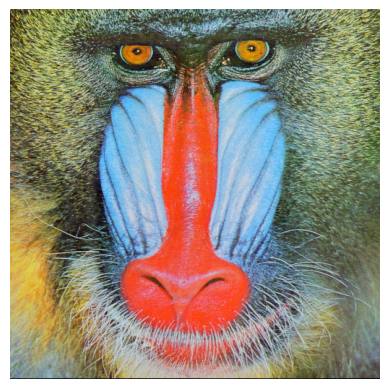

In [12]:
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

### Create and display histograms for each color channel (Red, Green, Blue):

#### Why this step matters?

##### This step matters to identify the each channel  distribution and we can see:
###### if the histogram for a channel is clustered at the left → most pixels are dark in that channel.
###### If it’s clustered at the right → most pixels are bright in that channel.
###### If it’s narrow in the middle → low contrast, details are not well separated.

In [13]:
R, G, B = cv2.split(rgb_image)

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_13716\736658221.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(R.ravel(), 256, [0, 256], color='red')


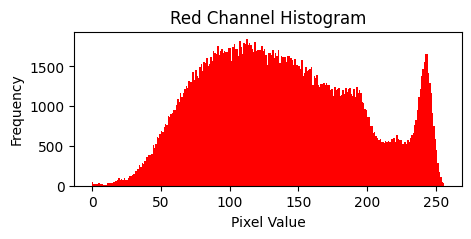

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_13716\736658221.py:9: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(G.ravel(), 256, [0, 256], color='green')


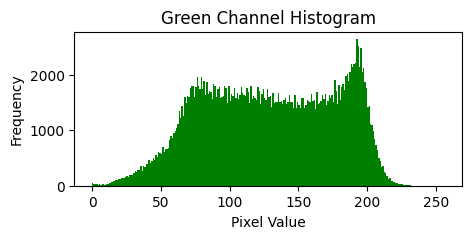

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_13716\736658221.py:16: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(B.ravel(), 256, [0, 256], color='blue')


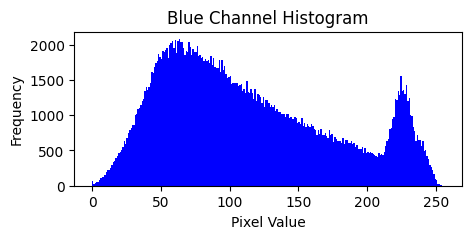

In [14]:
plt.figure(figsize=(5, 2))
plt.hist(R.ravel(), 256, [0, 256], color='red')
plt.title("Red Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(5, 2))
plt.hist(G.ravel(), 256, [0, 256], color='green')
plt.title("Green Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(5, 2))
plt.hist(B.ravel(), 256, [0, 256], color='blue')
plt.title("Blue Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

##### The Analysis:

###### **Red Channel:**
###### As we can see in the red channel the most pixels are normaly distributed and have low contrast in the image but, we have some pixels are more brighter in the right.
###### **Green Channel:**
###### As we can see in the green channel most pixels are normaly distributed and have low contrast in the image but, we have some pixels are more brighter in the right.
###### **Blue Channel:**
###### As we can see in the Blue channel most pixels are right skewd that means most pixels are more darker and we have a blues which are brighter.

### Apply intensity transformations to enhance image contrast and brightness:

In [15]:
alpha = 1.5
beta = 30
adjusted_img = cv2.convertScaleAbs(rgb_image, alpha=alpha, beta=beta)

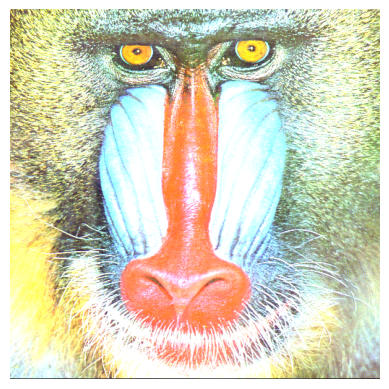

In [16]:
plt.imshow(adjusted_img)
plt.axis('off')
plt.show()

### Perform histogram equalization on each channel:

In [22]:
red_equa = cv2.equalizeHist(R)
green_equa = cv2.equalizeHist(G)
blue_equa = cv2.equalizeHist(B)

In [29]:
img_equa_rgb = cv2.merge((red_equa, green_equa, blue_equa))

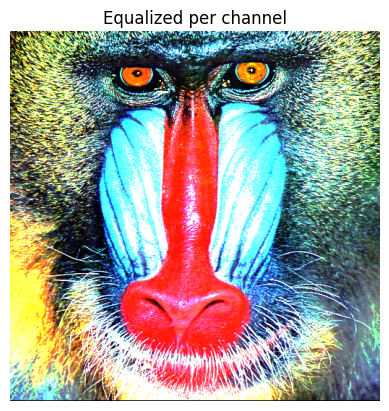

In [ ]:
plt.imshow(img_equa_rgb)
plt.axis("off")
plt.show()

### Convert the image to grayscale and create its histogram:

In [33]:
gray_img_ver = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

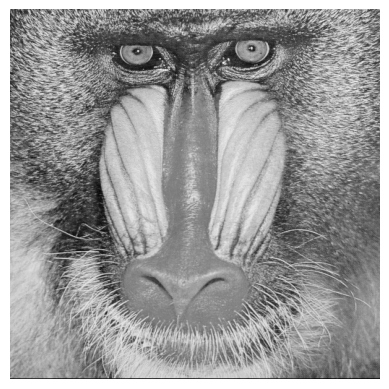

In [35]:
plt.imshow(gray_img_ver, cmap='gray')
plt.axis("off")
plt.show()

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_13716\2472894925.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(gray_img_ver.ravel(), 256, [0, 256])


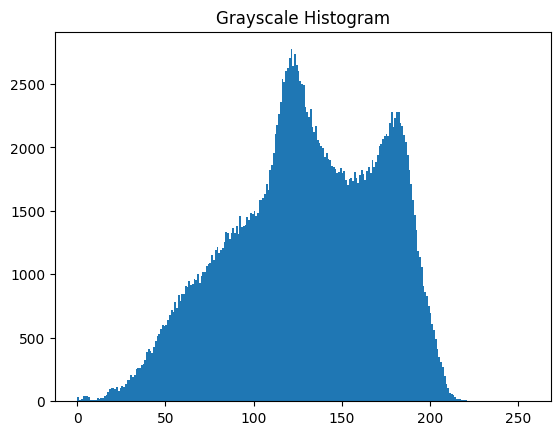

In [39]:
plt.hist(gray_img_ver.ravel(), 256, [0, 256])
plt.title("Grayscale Histogram")
plt.show()

### Apply Otsu’s thresholding to segment objects from the grayscale image:

In [49]:
_, otsu_threshold = cv2.threshold(gray_img_ver, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

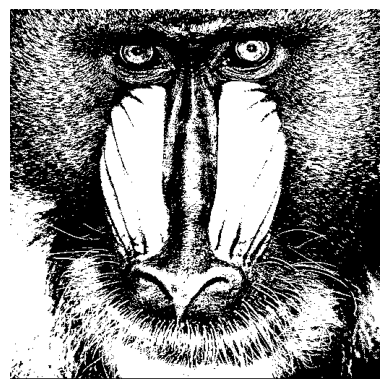

In [ ]:
plt.imshow(otsu_threshold, cmap='gray')
plt.axis('off')
plt.show()

In [52]:
def plot_image(image_1, image_2, title_1, title_2):
    plt.figure(figsize=(10, 10))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_1, cmap='gray')
    plt.title(title_1)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(image_2, cmap='gray')
    plt.title(title_2)
    plt.axis("off")

    plt.show()


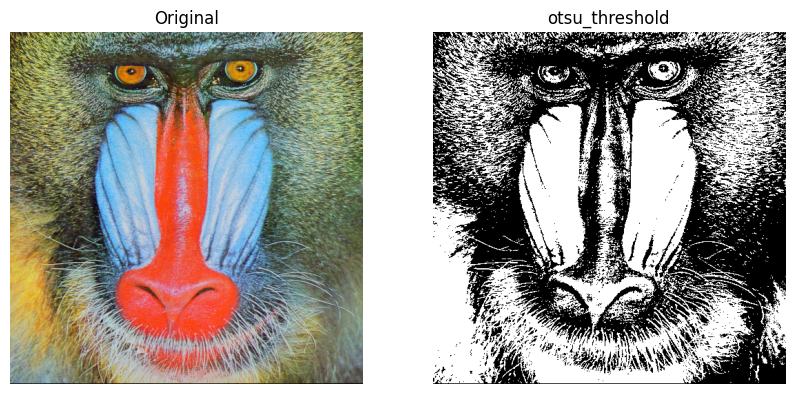

In [53]:
plot_image(rgb_image, otsu_threshold, "Original", "otsu_threshold")